In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn import preprocessing, cluster

#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv('pizza.csv')

In [2]:
df.head()
df_clean = df.drop_duplicates(subset=['keys'])

In [3]:
df_clean.shape
#There are 2285 unique locations for pizza restaurants

(2285, 19)

<function matplotlib.pyplot.show(close=None, block=None)>

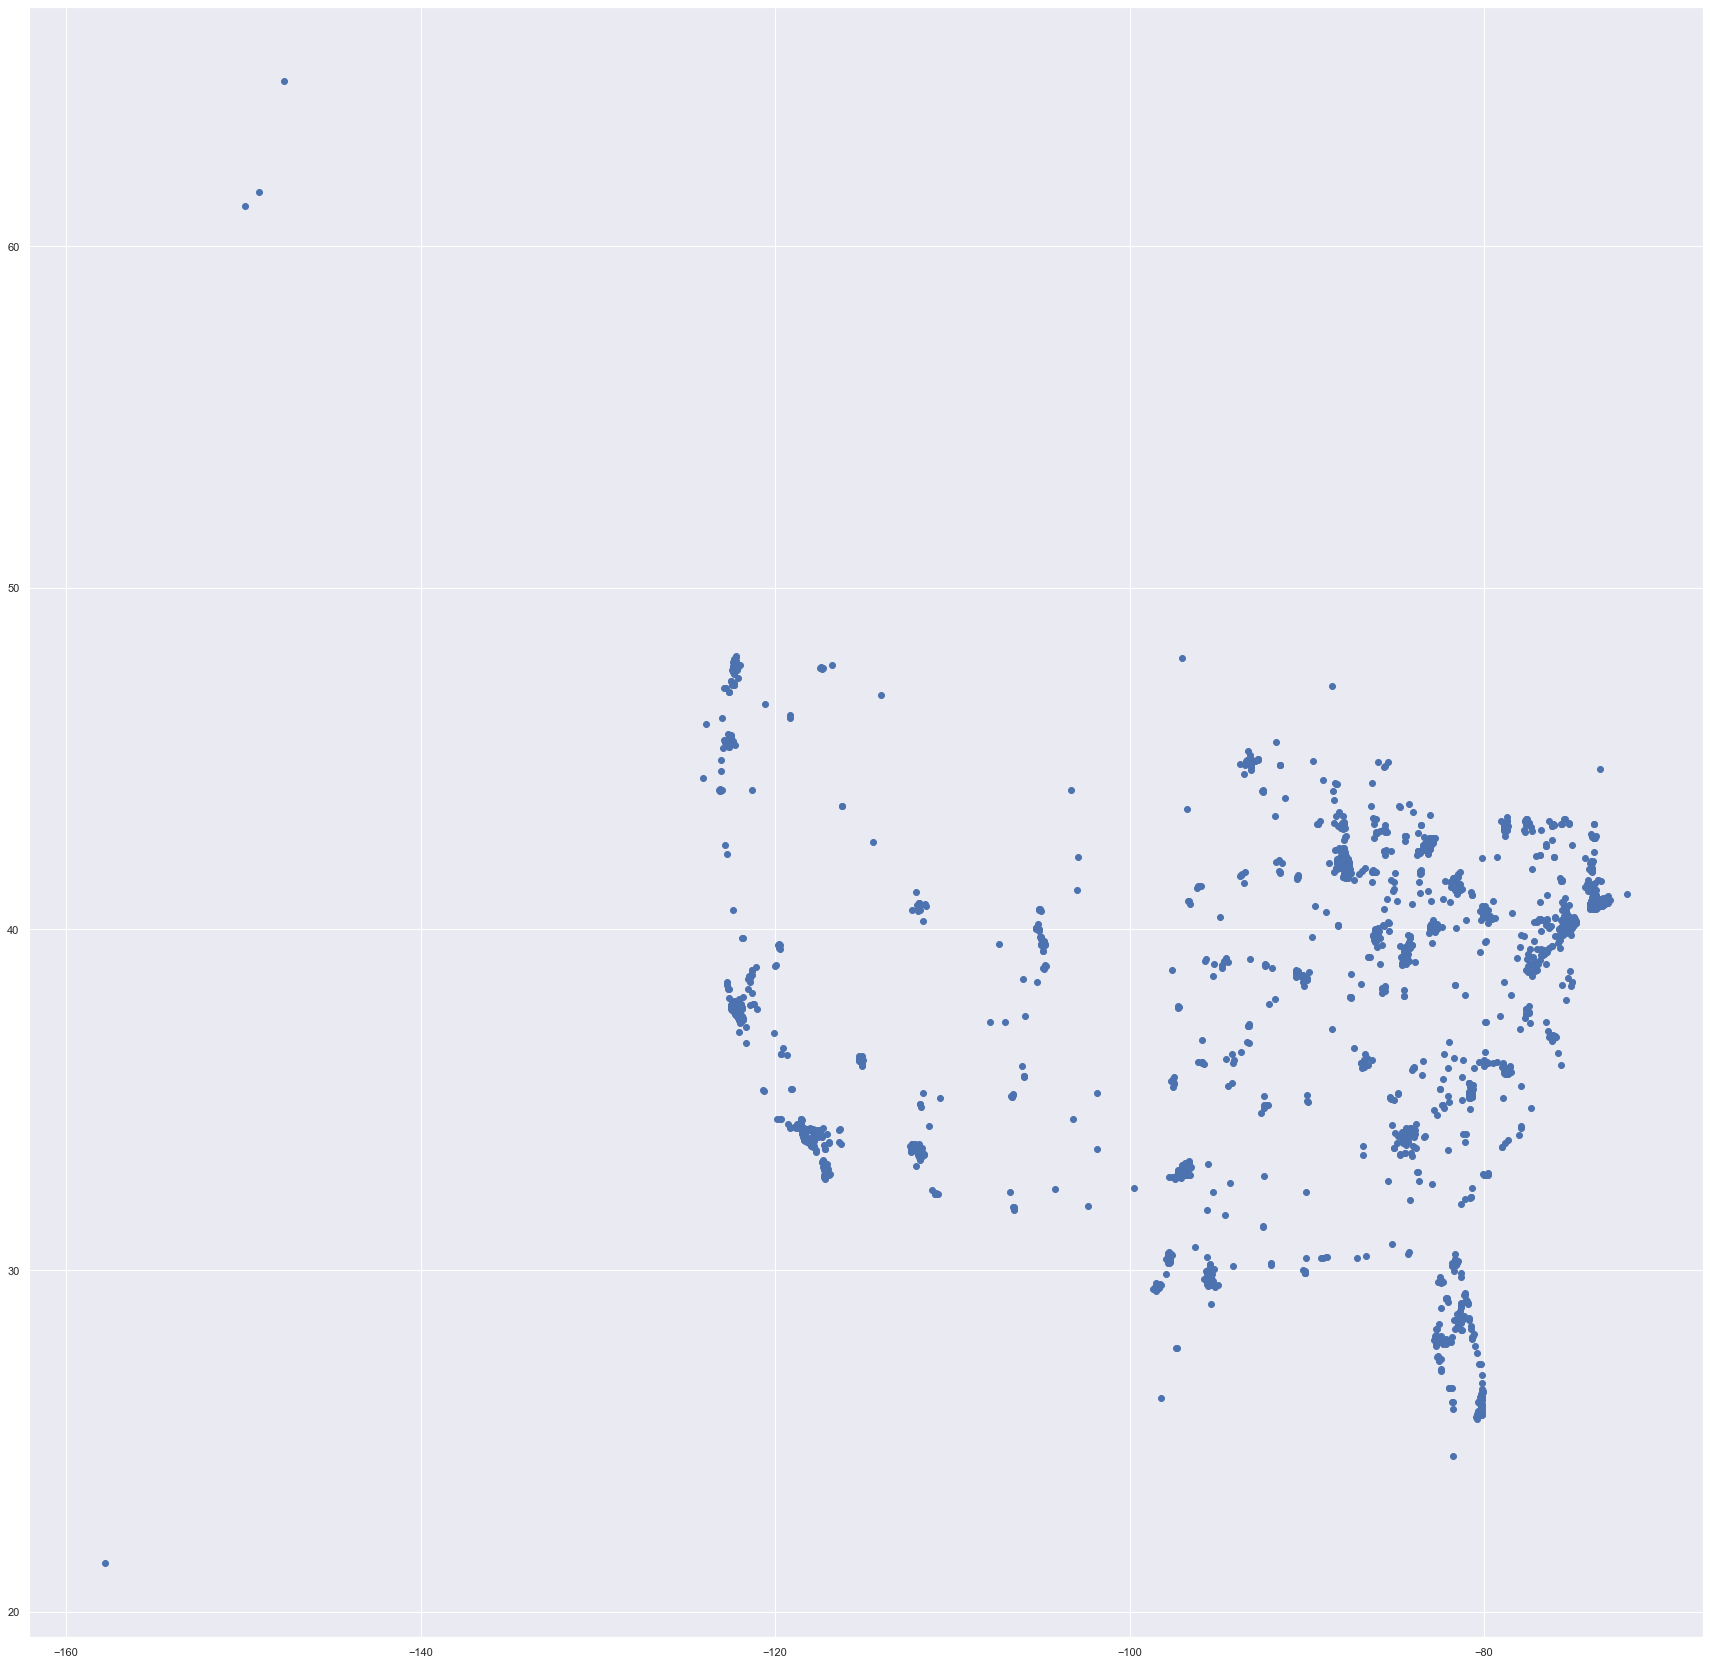

In [4]:
f, axes = plt.subplots(figsize=(30,30))

long = df_clean["longitude"]
lat = df_clean["latitude"]
plt.scatter(long,lat)
plt.show

## Noting that Alaska region contains 3 pizza joints, and Hawaii has 1 pizza joint, we will remove them from our dataset as we are not considering opening pizza joints in Alaksa nor Hawaii.

<function matplotlib.pyplot.show(close=None, block=None)>

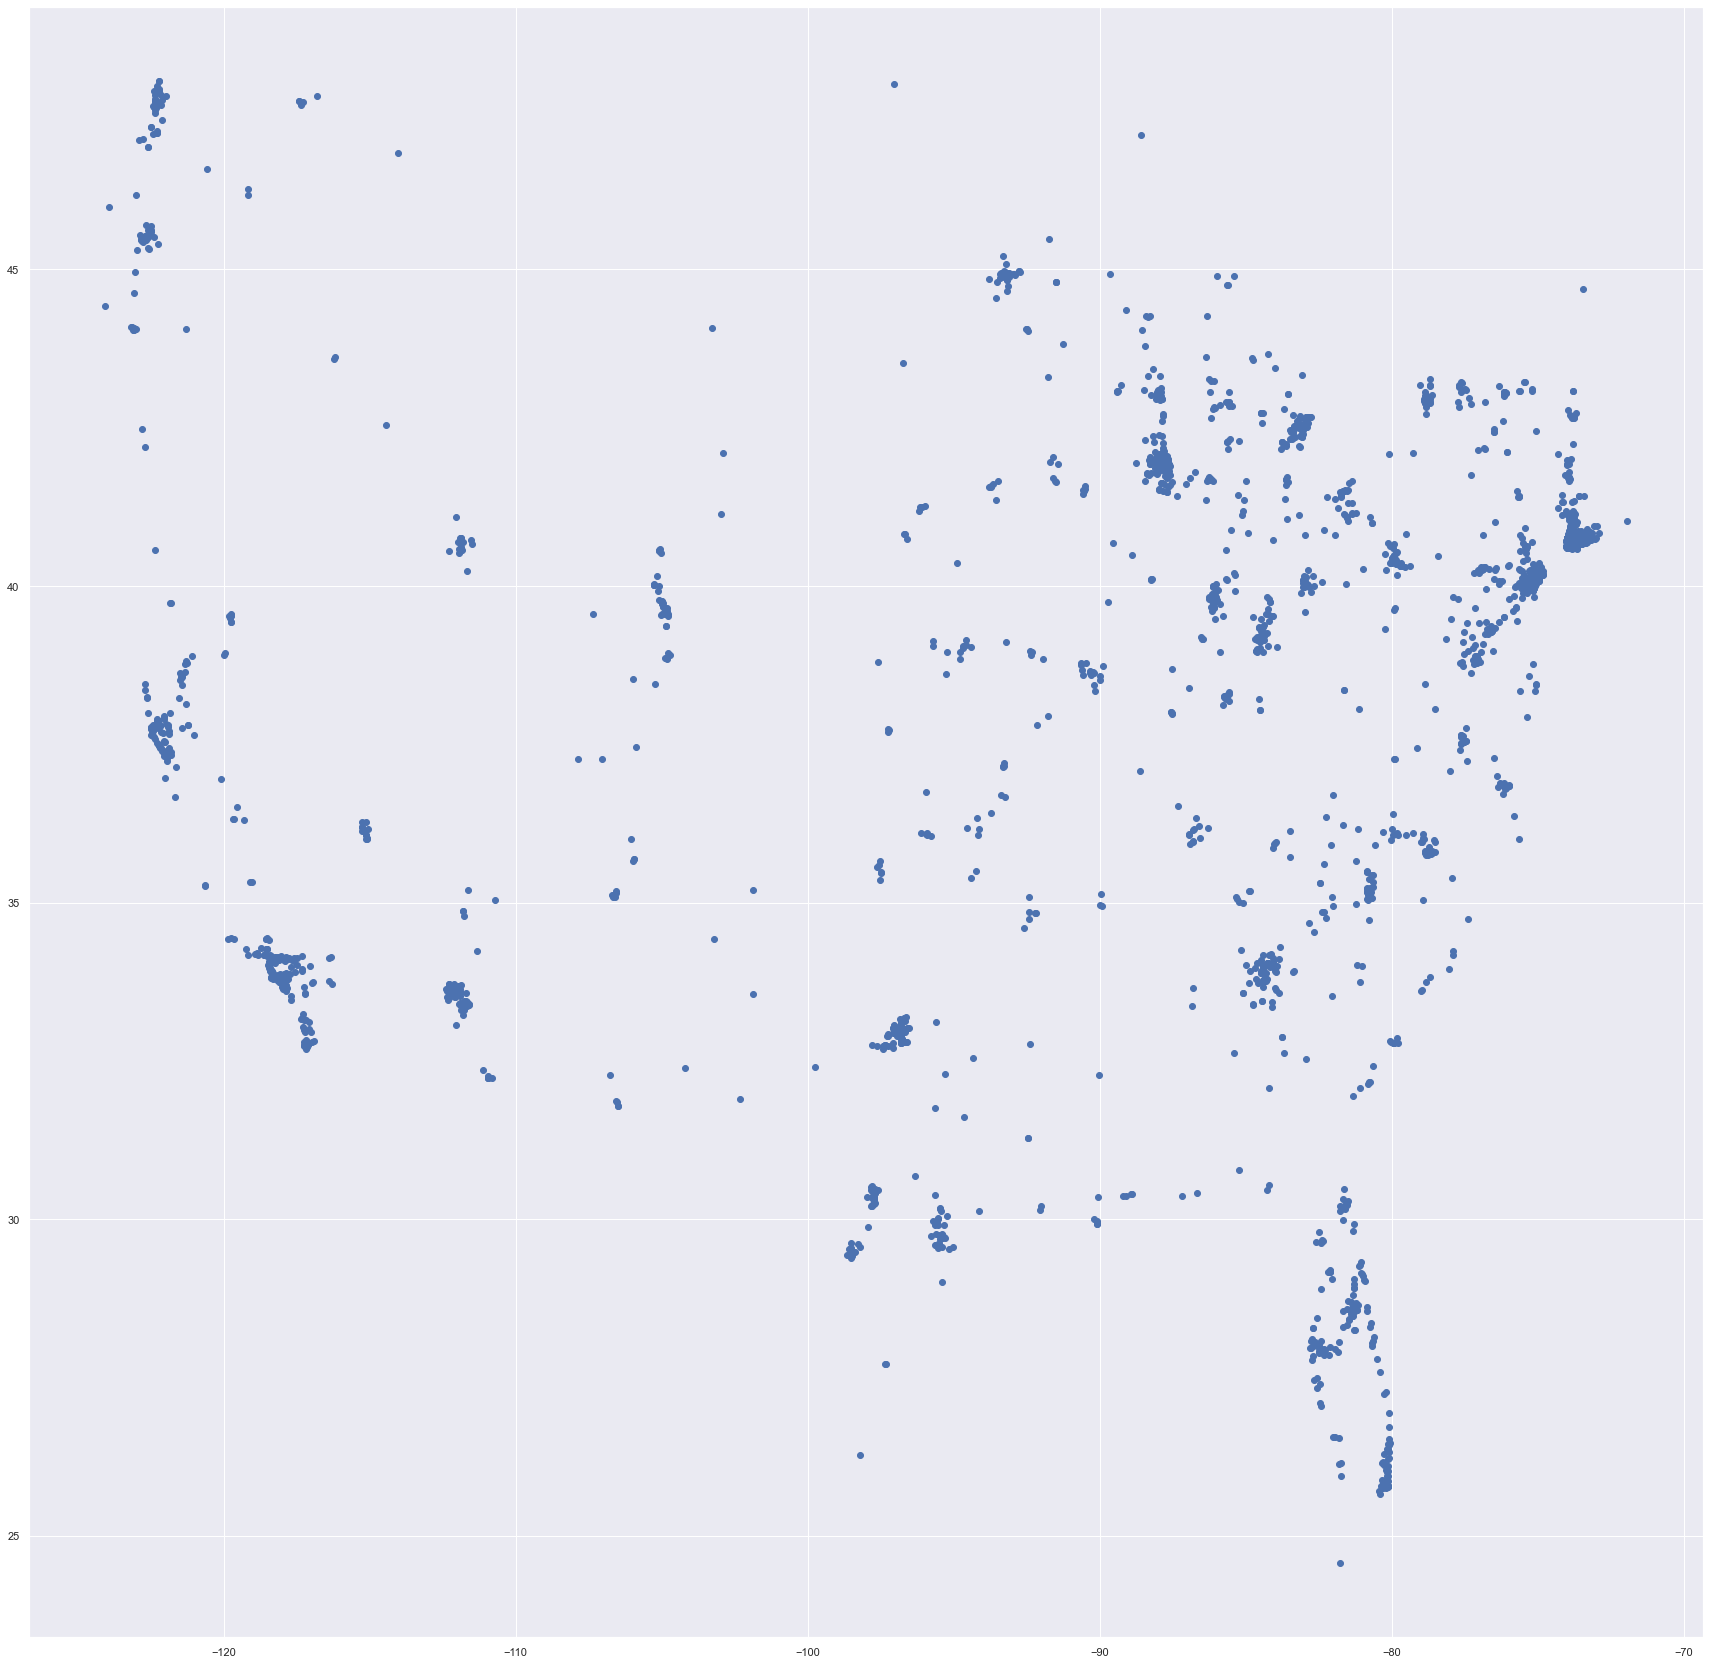

In [5]:
f, axes = plt.subplots(figsize=(30,30))

cleaned = df_clean[(df_clean['latitude'] < 50) & (df_clean['longitude'] > -140)]
long_clean = cleaned["longitude"]
lat_clean = cleaned["latitude"]

plt.scatter(long_clean,lat_clean)
plt.show

## Assign each individual datapoint to a cluster, set at 10 clusters for now

In [6]:
kmeans = KMeans(n_clusters = 10)
cluster = pd.DataFrame(cleaned[["longitude","latitude"]])
# cluster.shape
label = kmeans.fit_predict(cluster)
print(label[:50])

[5 6 4 4 3 1 0 4 6 8 9 3 5 0 3 0 4 1 3 5 6 3 4 2 3 3 6 8 3 3 6 4 6 5 6 9 4
 5 5 6 2 0 9 3 5 3 3 3 3 6]


## Showing all points of cluster label == 0

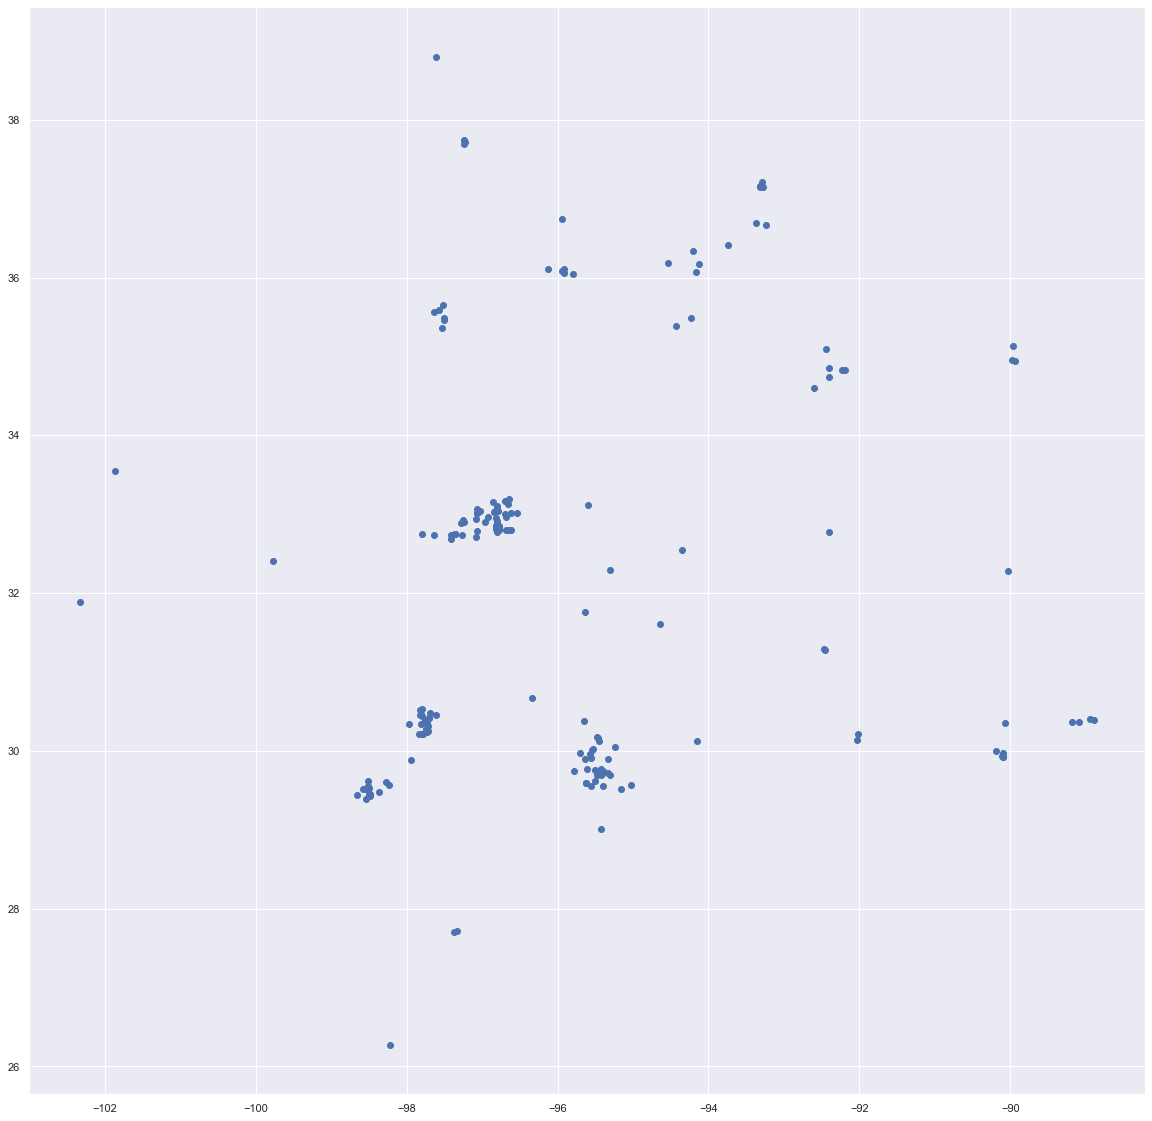

In [7]:
f, axes = plt.subplots(figsize=(20,20))
#filter rows of original data
filtered_label0 = cleaned[label == 5]
#print(filtered_label0)
#plotting the results
plt.scatter(filtered_label0["longitude"] , filtered_label0["latitude"])
plt.show()

## Given 10 clusters, this is how the datapoints will be categorised

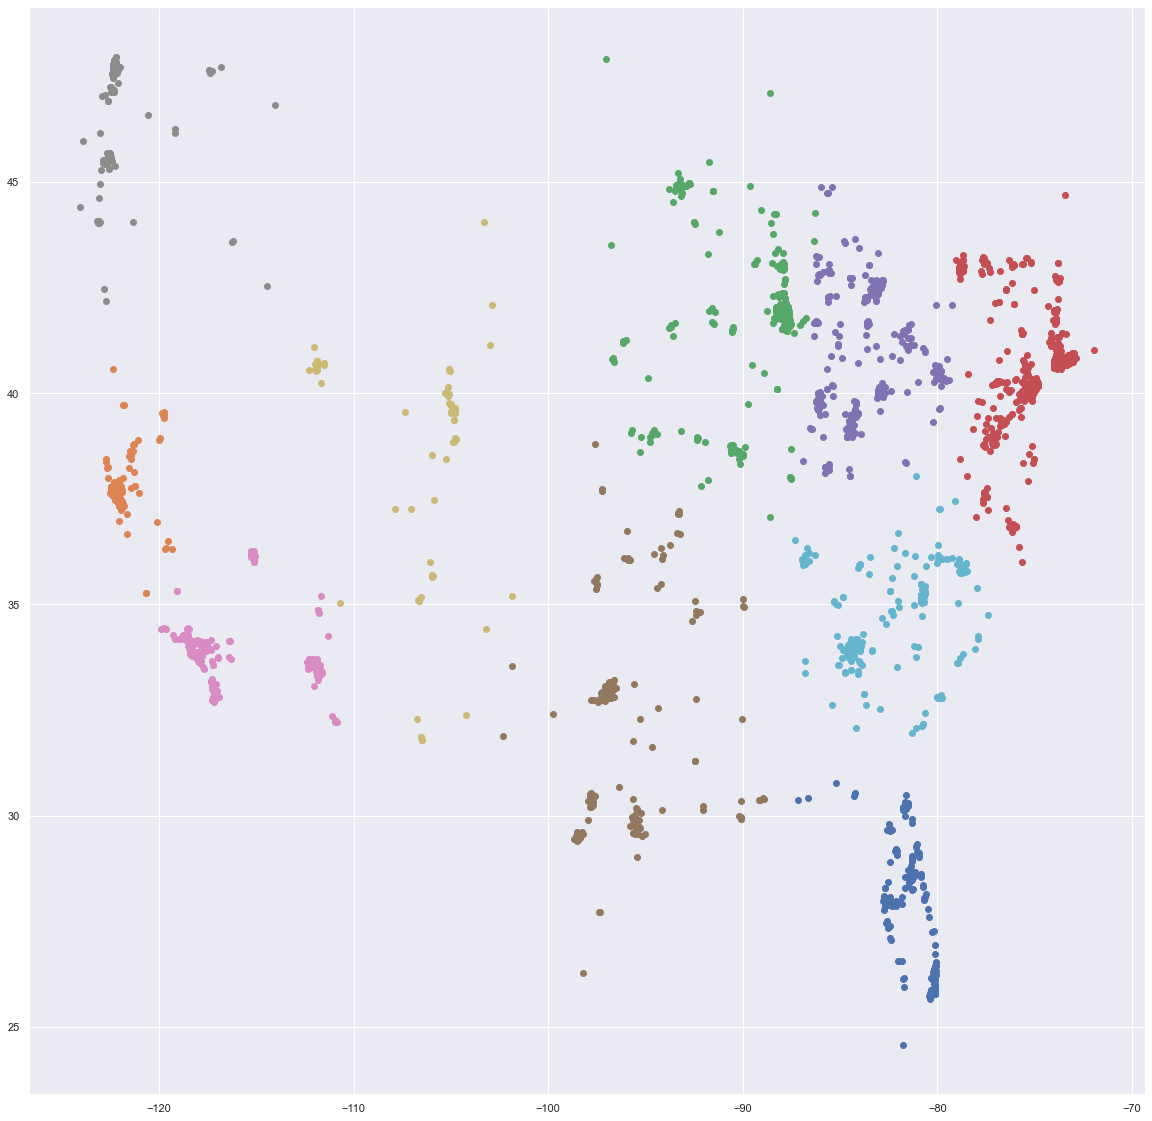

In [8]:
labels = np.unique(label)
f, axes = plt.subplots(figsize=(20,20))

for l in labels:
    filtered_label = cleaned[label == l]
    plt.scatter(filtered_label["longitude"] , filtered_label["latitude"])

## To find the optimal number of clusters (n), we will have to observe the 'elbow point' of Sum of Squared Error (SSE) against n. To plot this graph, we will calculate the SSE for every n up to 20.

In [9]:
def cal_inertia(n):
    cluster = pd.DataFrame(cleaned[["longitude","latitude"]])
    kmeans = KMeans(n_clusters = n).fit(cluster)
    kmeans.fit(cluster)
    
    label = kmeans.fit_predict(cluster)
    
    labels = np.unique(label)
   
    for l in labels:
        filtered_label = cleaned[label == l]

    return kmeans.inertia_


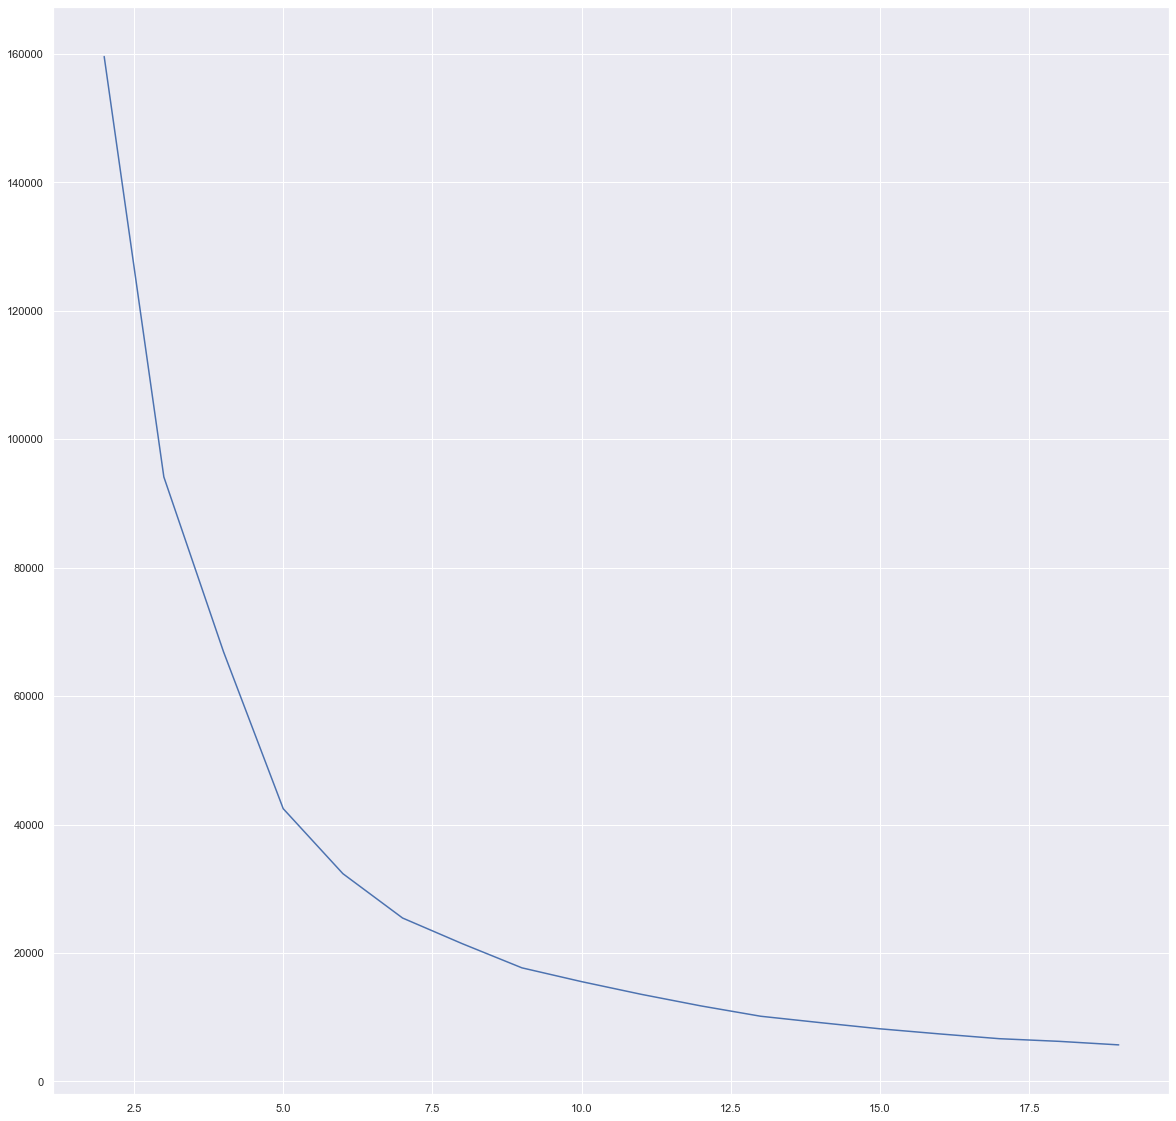

In [10]:
lst = []
max = 20
for i in range(2,max):
    lst.append(cal_inertia(i))

f, axes = plt.subplots(figsize=(20,20))
x_axis = list(range(2,max))
y_axis = lst
plt.plot(x_axis, y_axis)

In [17]:
from scipy.spatial.distance import cdist

distortions = []
mapping1 = {}
K = range(1, 20)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(cluster)
    kmeanModel.fit(cluster)
  
    distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / cluster.shape[0])
  
    mapping1[k] = sum(np.min(cdist(cluster, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / cluster.shape[0]

C:\Users\melvi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\melvi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


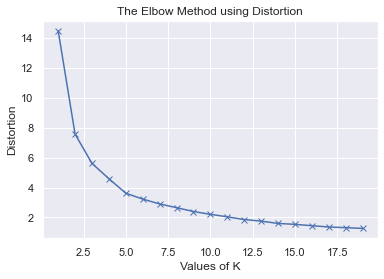

In [16]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()